In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

import csv

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
#file_path = "/home/jlab/ExternalDrive/Seagate/Data/data_16727_processed.csv"
#error_file_path = "/home/jlab/ExternalDrive/Seagate/Data/data_16727_laserErrors.csv"

#file_path = "/home/jlab/g-2/calorimeter/data/ExternalDrive/islands/data_17078_processed.csv"
#error_file_path = "/home/jlab/g-2/calorimeter/data/ExternalDrive/islands/data_17078_laserErrors.csv"

file_path = "/home/jlab/g-2/calorimeter/data/ExternalDrive/islands/data_15897_processed.csv"
error_file_path = "/home/jlab/g-2/calorimeter/data/ExternalDrive/islands/data_15897_laserErrors.csv"

df = pandas.read_csv(file_path, header=None)

In [3]:
print(df.keys())
print(df.head())

df.describe()

Int64Index([0, 1, 2], dtype='int64')
    0      1  2
0  54   5379  1
1  54  19414  1
2   6  19686  1
3   6  19732  1
4  24  19778  1


,0,1,2
count,2.082048e+07,2.082048e+07,2.082048e+07
mean,1.403892e+01,7.423197e+04,1.226777e+01
std,1.039974e+01,6.944040e+04,6.942999e+00
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,8.000000e+00,3.153500e+04,6.000000e+00
50%,1.200000e+01,5.288500e+04,1.200000e+01
75%,1.500000e+01,9.063500e+04,1.800000e+01
max,5.400000e+01,5.599910e+05,2.400000e+01


In [4]:
threeByThreeVec = df[0]
startTimeVec = df[1]
caloVec = df[2]

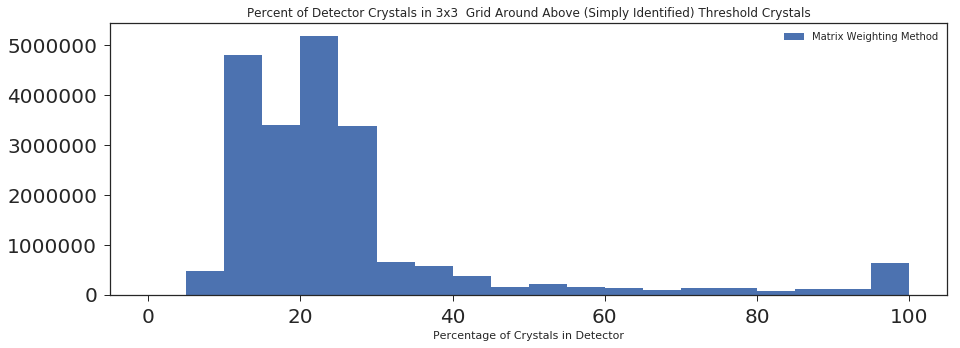

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
#plt.hist(simpleWeighted,bins=40,label='Simple Weighting',range=(0,100))
#plt.hist([x*100/54 for x in threeByThreeVec],bins=50,label='Matrix Weighting Method',range=(0,100))
plt.hist([x*100/54 for x in threeByThreeVec],bins=20,label='Matrix Weighting Method',range=(0,100))
plt.title("Percent of Detector Crystals in 3x3  Grid Around Above (Simply Identified) Threshold Crystals")
plt.xlabel("Percentage of Crystals in Detector")
#plt.xticks(np.arange(0, 101, step=5),rotation=90)
plt.legend()
plt.show()

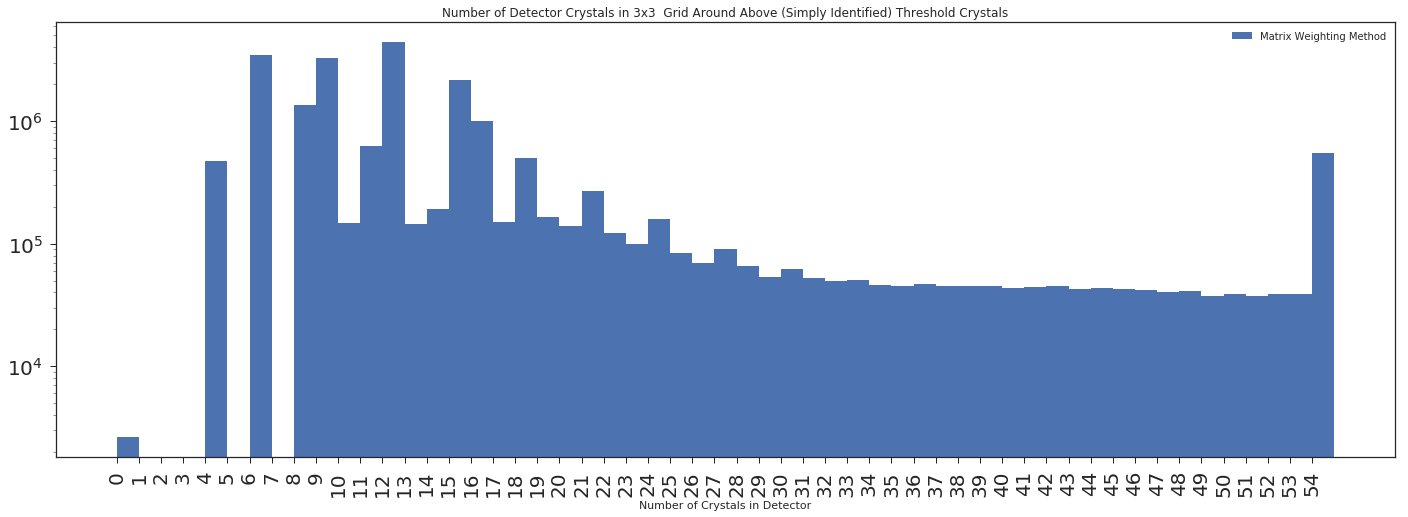

In [19]:
fig, ax = plt.subplots(figsize=(24, 8))
#plt.hist(simpleWeighted,bins=40,label='Simple Weighting',range=(0,100))
plt.hist(threeByThreeVec,bins=55,label='Matrix Weighting Method',range=(0,55))
plt.title("Number of Detector Crystals in 3x3  Grid Around Above (Simply Identified) Threshold Crystals")
plt.xlabel("Number of Crystals in Detector")
plt.legend()
plt.xticks(np.arange(0, 55, step=1),rotation=90)
ax.set_yscale("log", nonposy='clip')
plt.show()

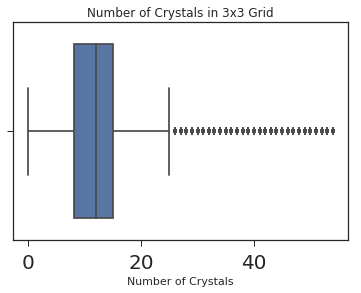

Mean: 14.038924122890142


In [7]:
sns.boxplot(threeByThreeVec)
plt.title("Number of Crystals in 3x3 Grid")
plt.xlabel("Number of Crystals")
plt.show()
print("Mean:",np.mean(threeByThreeVec))

In [8]:
print("Percentage of crystals in use -> percentage of data we can save")
print(np.mean(threeByThreeVec)/54.*100, "->",100 - np.mean(threeByThreeVec)/54.*100)

Percentage of crystals in use -> percentage of data we can save
25.998007634981747 -> 74.00199236501825


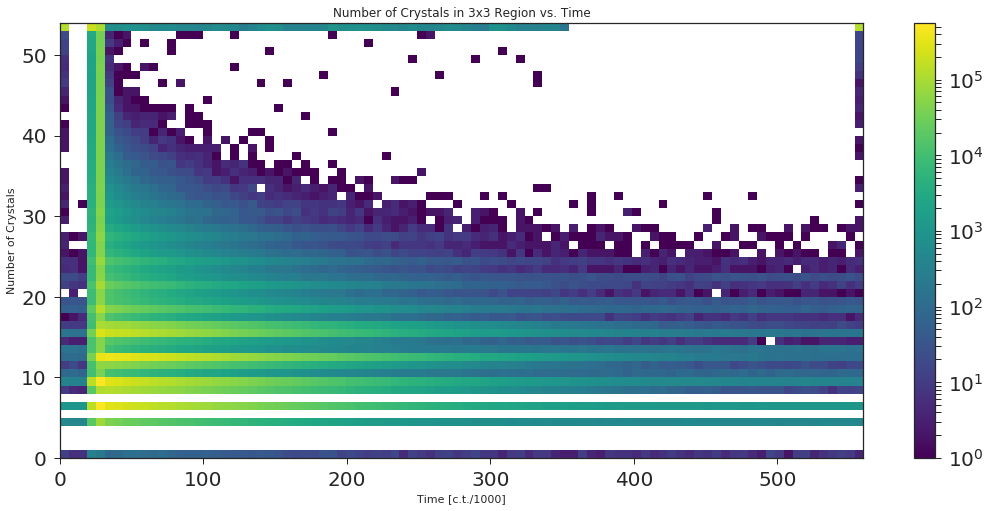

In [9]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.hist2d([x/1000 for x in startTimeVec],threeByThreeVec,bins=(90,54),cmap='viridis',norm=matplotlib.colors.LogNorm())
plt.title("Number of Crystals in 3x3 Region vs. Time")
plt.xlabel("Time [c.t./1000]")
plt.ylabel("Number of Crystals")
plt.colorbar()
plt.show()

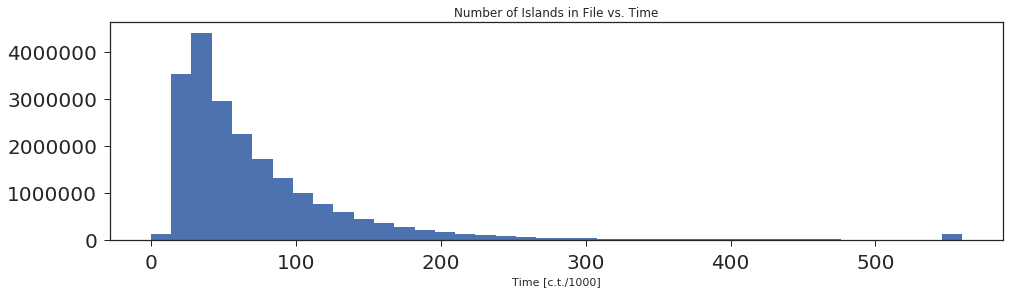

In [10]:
fig, ax = plt.subplots(figsize=(16, 4))
plt.hist([x/1000 for x in startTimeVec],bins=40)
plt.title("Number of Islands in File vs. Time")
plt.xlabel("Time [c.t./1000]")
#ax.set_yscale("log", nonposy='clip')
plt.show()

In [20]:
percentageTotal = 0.0
for x in threeByThreeVec:
    percentage = x*100.0/54.0
    percentageTotal = percentageTotal + percentage
    
percentageTotal = percentageTotal / len(threeByThreeVec)
print(percentageTotal, "% used in across hits")

25.998007633380514 % used in across hits


In [12]:
count = 0
singleislandcount = 0
for x in threeByThreeVec:
    if x < 1:
        count = count + 1
    if x < 10:
        singleislandcount = singleislandcount + 1
        
print(count, "which have no crystals above threshold")
print(count / singleislandcount * 100, "%")
print(singleislandcount + count)

2630 which have no crystals above threshold
0.03084556248466518 %
8528978


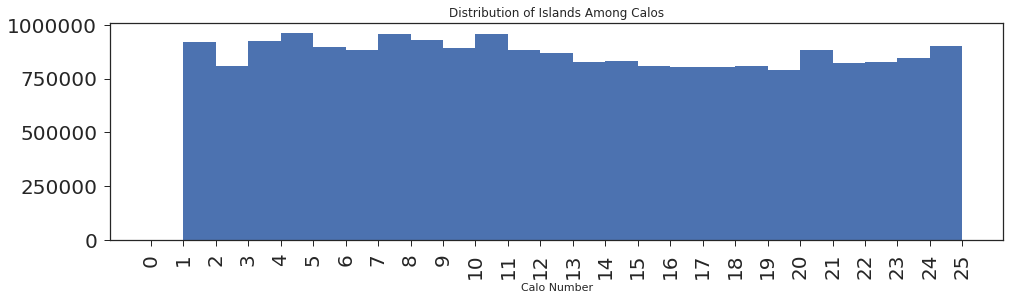

In [13]:
fig, ax = plt.subplots(figsize=(16, 4))
plt.hist(caloVec,bins=25,range=(0,25))
plt.xticks(np.arange(0, 26, step=1),rotation=90)
plt.title("Distribution of Islands Among Calos")
plt.xlabel("Calo Number")
plt.show()

In [14]:
#open error file and fill an error dataframe
errorframe = pandas.read_csv(error_file_path,header=None)
errorframe.head()

,0,1,2,3,4,5,6,7
0,DATA:,4575,29,1,0,5229,25,1
1,DATA:,4576,29,1,0,559685,25,0
2,DATA:,4523,29,3,0,5230,25,1
3,DATA:,4524,29,3,0,559685,25,0
4,DATA:,4586,29,5,0,5230,25,1


In [15]:
errorframe.describe()

,1,2,3,4,5,6,7
count,11596.000000,11596.0,11596.000000,11596.0,11596.000000,11596.0,11596.000000
mean,3993.591411,29.0,82.320628,0.0,272305.094257,25.0,0.700069
std,1066.771116,0.0,47.999358,0.0,266393.835735,0.0,0.781129
min,459.000000,29.0,1.000000,0.0,5207.000000,25.0,0.000000
25%,3904.000000,29.0,42.000000,0.0,5223.000000,25.0,0.000000
50%,4364.000000,29.0,82.000000,0.0,188539.500000,25.0,1.000000
75%,4529.000000,29.0,122.000000,0.0,559677.000000,25.0,1.000000
max,5035.000000,29.0,236.000000,0.0,559691.000000,25.0,3.000000


In [16]:
errorTimes = errorframe[5]
errorLength = errorframe[2] + 1
errorCalos = errorframe[6]

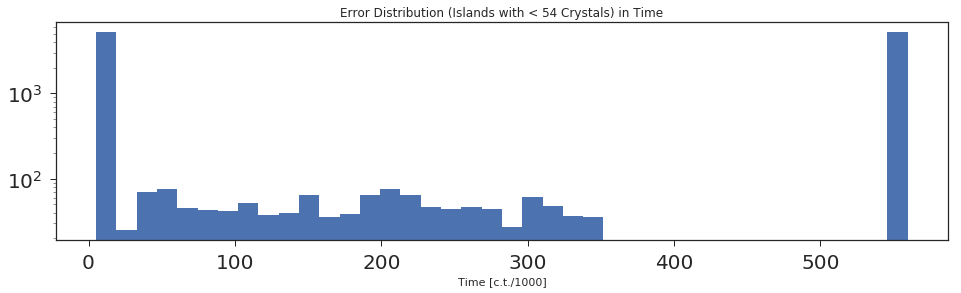

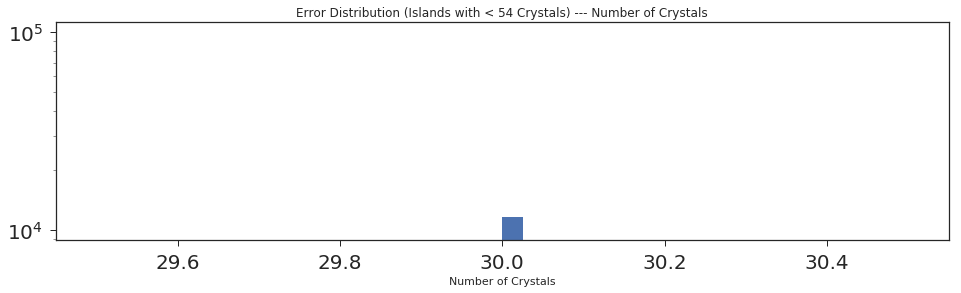

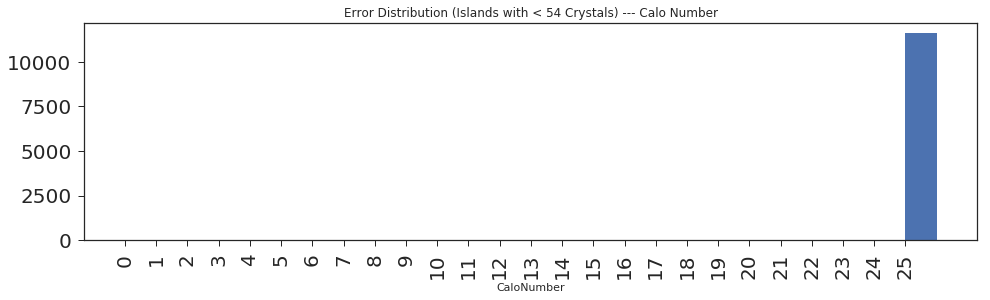

In [17]:
fig, ax = plt.subplots(figsize=(16, 4))
plt.hist([int(x)/1000 for x in errorTimes],bins=40)
plt.title("Error Distribution (Islands with < 54 Crystals) in Time")
plt.xlabel("Time [c.t./1000]")
#plt.xticks(np.arange(0, 500, step=50),rotation=90)
ax.set_yscale("log", nonposy='clip')
plt.show()

fig, ax = plt.subplots(figsize=(16, 4))
plt.hist(errorLength,bins=40)
plt.title("Error Distribution (Islands with < 54 Crystals) --- Number of Crystals")
plt.xlabel("Number of Crystals")
#plt.xticks(np.arange(0, 500, step=50),rotation=90)
ax.set_yscale("log", nonposy='clip')
plt.show()


fig, ax = plt.subplots(figsize=(16, 4))
plt.hist(errorCalos,bins=26,range=(0,26))
plt.title("Error Distribution (Islands with < 54 Crystals) --- Calo Number")
plt.xlabel("CaloNumber")
plt.xticks(np.arange(0, 26, step=1),rotation=90)
#ax.set_yscale("log", nonposy='clip')
plt.show()